In [202]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.data import coins
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import closing, square
from skimage.measure import regionprops, label
from skimage.color import lab2rgb
from sklearn.cluster import KMeans
%matplotlib inline

In [203]:
def frame_border(box):
    minr, minc, maxr, maxc = box
    return mpatches.Rectangle(xy=(minc, minr), 
                             width=maxc-minc,
                             height=maxr-minr,
                             fill=False,
                             edgecolor='red',
                             linewidth=2)

In [204]:
img = cv2.imread('../images/G_2036_129613.png')

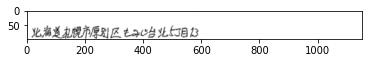

In [205]:
#ガウシアンフィルタによるぼかしを入れた。文字を太くすることが目的である。
#しかしながら、正規分布のパラメータ設定は恣意的なものである。
N = 9
img_blur = cv2.GaussianBlur(img, (N, N), 0)
plt.imshow(img_blur)

In [206]:
# 画像の２値化に加えて、白黒反転を行っている。
# しきい値には、大津の方法を用いている。
ret2, img_bin = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# test = (img_bin[:,] >= 0).all()
# print test
# for i in range(y_axis_size):
#     if (img_bin[:, i] == 0).all():
#         img_bin = np.delete(img_bin, i, 1)
# plt.imshow(img_bin)


error: /tmp/opencv-20170224-1869-10nlf6f/opencv-2.4.13.2/modules/imgproc/src/thresh.cpp:718: error: (-215) src.type() == CV_8UC1 in function threshold


In [207]:
#これは文字が全部消えてしまい、うまくいかない場合があった。
#img_cls = clear_border(closing(img>128, square(5)))
#plt.imshow(img_cls)
sup = []
inf = []
y_axis_size = img_bin.shape[0]
x_axis_size = img_bin.shape[1]
for i in range(x_axis_size):
    if img_bin[:, i] == np.zeros(x_axis_size):
        

for i in range(x_axis_size):
    upper_size = 0
    lower_size = y_axis_size
    for j in img_bin[:, i]:
        if j == 0:
            upper_size += 1
        if j == 255:
            break
    for j in img_bin[:, i][::-1]:
        if j == 0:
            lower_size -= 1
        if j == 255:
            break
    inf.append(lower_size)
    sup.append(upper_size)

sup_hist = np.array(sup)
inf_hist = np.array(inf)
fsup = np.array(sup, dtype=np.float)
finf = np.array(inf, dtype=np.float)
norm = finf - fsup
ndiff = np.gradient(norm, 2)

sgn = []
c = 10
for i in range(x_axis_size):
    # word exists!
    if finf[i] - fsup[i] <= c:
        sgn.append(0)
    # blank part exists!
    else:
        sgn.append(1)
sgn_hist = np.array(sgn)

plt.subplot(5, 1, 1)
plt.xlim(0, x_axis_size)
#plt.xlim(700, 1000)
plt.plot(sup_hist, label='sup')
plt.plot(inf_hist, label='inf')
plt.legend(loc="upper right")

plt.subplot(5, 1, 2)
plt.xlim(0, x_axis_size)
# plt.ylim(0, y_axis_size)
axis = [c for i in range(x_axis_size)]
plt.plot(axis)
plt.plot(norm, label='norm')
plt.legend(loc="upper right")

plt.subplot(5, 1, 3)
# finf = np.array(sup, dtype=np.float)
# diff2= np.gradient(finf)
plt.xlim(0, x_axis_size)
# plt.plot(diff2, label='inf')
plt.plot(sgn_hist)
plt.legend(loc="upper right")

plt.subplot(5, 1, 4)
plt.xlim(0, x_axis_size)
plt.plot(ndiff, label='norm diff')
plt.legend(loc="upper right")

plt.subplot(5, 1, 5)
plt.xlim(0, x_axis_size)
plt.imshow(img_bin, aspect='auto')

IndentationError: expected an indented block (<ipython-input-207-e6d857187852>, line 12)

In [196]:
img.shape

(97, 1152, 3)

In [208]:
features = np.array([[sup[i], inf[i]] for i in range(x_axis_size)])
kmeans_model = KMeans(n_clusters=4, random_state=10).fit(features)
labels = kmeans_model.labels_

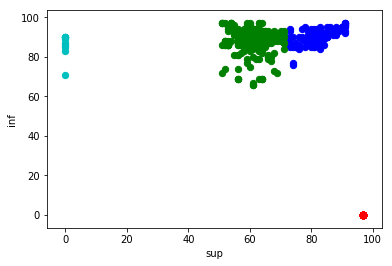

In [198]:
colors = ["r", "g", "b", "c"]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for label, feature in zip(labels, features):
    #print label, feature[0]
    ax.set_xlabel('sup')
    ax.set_ylabel('inf')
    plt.scatter(feature[0], feature[1], s=40, marker='o', c=colors[label])
plt.show()

In [199]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`
    
    Marker size is scaled by `s` and marker color is mapped to `c`
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array 